In [248]:
import pandas as pd
from pandas.core.arrays.sparse import SparseArray as _SparseArray
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
import scipy.stats as stats

In [249]:
df_dvery = pd.read_csv('/Users/Ramv/Downloads/delhivery_data.csv')
df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [250]:
df_dvery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [251]:
df_dvery.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [252]:
df_dvery.drop(df_dvery[df_dvery['source_name'].isna() | df_dvery['destination_name'].isna()].index , inplace=True)

In [253]:
df_dvery.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

# Grouping by Segment

In [254]:
df_dvery['segment_key']=df_dvery.apply(lambda x:"#".join([x['trip_uuid'],x['source_center'],x['destination_center']]), axis=1)

In [255]:
df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,trip-153746066843555182#IND131028AAB#IND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,trip-153746066843555182#IND131028AAB#IND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,trip-153746066843555182#IND131028AAB#IND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,trip-153746066843555182#IND131028AAB#IND000000ACB


# Grouping by Segment

a. Create a unique identifier for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.

b. You can use inbuilt functions like groupby and aggregations like
cumsum() to merge the rows in columns segment_actual_time, segment_osrm_distance, segment_osrm_time based on the segment_key.

c. This way you’ll get new columns named segment_actual_time_sum, segment_osrm_distance_sum, segment_osrm_time_sum.

In [256]:
df_dvery['segment_actual_time_cumsum']=df_dvery.groupby('segment_key')['segment_actual_time'].transform(lambda x:x.cumsum())

df_dvery['segment_osrm_time_cumsum']=df_dvery.groupby('segment_key')['segment_osrm_time'].transform(lambda x:x.cumsum())

df_dvery['segment_osrm_distance_cumsum']=df_dvery.groupby('segment_key')['segment_osrm_distance'].transform(lambda x:x.cumsum())

In [257]:
df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB,67.0,44.0,49.4772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,67.9280,1.566667,12.0,12.0,8.1858,1.000000,trip-153746066843555182#IND131028AAB#IND000000ACB,92.0,94.0,65.3487
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,85.6829,1.578947,26.0,21.0,17.3725,1.238095,trip-153746066843555182#IND131028AAB#IND000000ACB,118.0,115.0,82.7212
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,97.0933,1.590909,20.0,34.0,20.7053,0.588235,trip-153746066843555182#IND131028AAB#IND000000ACB,138.0,149.0,103.4265
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,111.2709,1.612245,17.0,27.0,18.8885,0.629630,trip-153746066843555182#IND131028AAB#IND000000ACB,155.0,176.0,122.3150


# Aggregating at Segment level


a. Create a dictionary named create_segment_dict, that defines how to
aggregate and select values.

    i. You can keep the first and last values for some
    numeric/categorical fields if aggregating them won’t make sense.

b. Further group the data by segment_key because you want to perform
aggregation operations for different segments of each trip based on the
segment_key value.

c. The aggregation functions specified in the create_segment_dict are
applied to each group of rows with the same segment_key.

d. Sort the resulting DataFrame segment, by two criteria:
    
    i. First, it sorts by segment_key to ensure that segments are ordered consistently.
    ii. Second, it sorts by od_end_time in ascending order, ensuring that segments within the same trip are ordered by their end times from earliest to latest.

In [258]:
df_dvery['segment_actual_time_sum']=df_dvery.groupby('segment_key')['segment_actual_time_cumsum'].transform(lambda x:x.iloc[-1])
df_dvery['segment_osrm_time_sum']=df_dvery.groupby('segment_key')['segment_osrm_time_cumsum'].transform(lambda x:x.iloc[-1])
df_dvery['segment_osrm_distance_sum']=df_dvery.groupby('segment_key')['segment_osrm_distance_cumsum'].transform(lambda x:x.iloc[-1])

In [259]:
df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB,14.0,11.0,11.9653,67.0,44.0,49.4772
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB,24.0,20.0,21.7243,67.0,44.0,49.4772
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB,40.0,27.0,32.5395,67.0,44.0,49.4772
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB,61.0,39.0,45.5619,67.0,44.0,49.4772
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB,67.0,44.0,49.4772,67.0,44.0,49.4772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,12.0,8.1858,1.000000,trip-153746066843555182#IND131028AAB#IND000000ACB,92.0,94.0,65.3487,423.0,185.0,131.1238
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,21.0,17.3725,1.238095,trip-153746066843555182#IND131028AAB#IND000000ACB,118.0,115.0,82.7212,423.0,185.0,131.1238
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,34.0,20.7053,0.588235,trip-153746066843555182#IND131028AAB#IND000000ACB,138.0,149.0,103.4265,423.0,185.0,131.1238
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,27.0,18.8885,0.629630,trip-153746066843555182#IND131028AAB#IND000000ACB,155.0,176.0,122.3150,423.0,185.0,131.1238


In [260]:
df_dvery_1 = df_dvery.sort_values(by=['segment_key','od_end_time'])
df_dvery_1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,33.0,38.0620,1.515152,trip-153671041653548748#IND209304AAA#IND000000ACB,50.0,33.0,38.0620,728.0,534.0,670.6205
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,8.0,10.9921,1.125000,trip-153671041653548748#IND209304AAA#IND000000ACB,59.0,41.0,49.0541,728.0,534.0,670.6205
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,22.0,30.6308,1.545455,trip-153671041653548748#IND209304AAA#IND000000ACB,93.0,63.0,79.6849,728.0,534.0,670.6205
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,17.0,25.0959,1.470588,trip-153671041653548748#IND209304AAA#IND000000ACB,118.0,80.0,104.7808,728.0,534.0,670.6205
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,14.0,21.0389,1.428571,trip-153671041653548748#IND209304AAA#IND000000ACB,138.0,94.0,125.8197,728.0,534.0,670.6205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86464,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,6.0,6.4998,1.333333,trip-153861115439069069#IND628801AAA#IND628204AAA,29.0,14.0,16.0184,29.0,14.0,16.0184
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,17.0,23.9866,2.647059,trip-153861118270144424#IND583119AAA#IND583101AAA,45.0,17.0,23.9866,233.0,42.0,52.5303
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,25.0,28.5437,7.520000,trip-153861118270144424#IND583119AAA#IND583101AAA,233.0,42.0,52.5303,233.0,42.0,52.5303
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,21.0,23.2367,1.428571,trip-153861118270144424#IND583201AAA#IND583119AAA,30.0,21.0,23.2367,41.0,25.0,28.0484


# Feature extraction 1


1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.
2. Destination Name: Split and extract features out of destination. City-place-code
(State)
3. Source Name: Split and extract features out of destination. City-place-code
(State)
4. Trip_creation_time: Extract features like month, year, day, etc.

In [261]:
# Ensure that 'od_end_time' and 'od_start_time' are in datetime format
df_dvery_1['od_end_time'] = pd.to_datetime(df_dvery_1['od_end_time'])
df_dvery_1['od_start_time'] = pd.to_datetime(df_dvery_1['od_start_time'])

In [262]:
# Calculate the time difference in hours
df_dvery_1['od_time_diff_hour'] = (df_dvery_1['od_end_time'] - df_dvery_1['od_start_time']) / pd.Timedelta(hours=1)

In [263]:
df_dvery_1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,38.0620,1.515152,trip-153671041653548748#IND209304AAA#IND000000ACB,50.0,33.0,38.0620,728.0,534.0,670.6205,21.010074
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,10.9921,1.125000,trip-153671041653548748#IND209304AAA#IND000000ACB,59.0,41.0,49.0541,728.0,534.0,670.6205,21.010074
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,30.6308,1.545455,trip-153671041653548748#IND209304AAA#IND000000ACB,93.0,63.0,79.6849,728.0,534.0,670.6205,21.010074
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,25.0959,1.470588,trip-153671041653548748#IND209304AAA#IND000000ACB,118.0,80.0,104.7808,728.0,534.0,670.6205,21.010074
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.0389,1.428571,trip-153671041653548748#IND209304AAA#IND000000ACB,138.0,94.0,125.8197,728.0,534.0,670.6205,21.010074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86464,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,6.4998,1.333333,trip-153861115439069069#IND628801AAA#IND628204AAA,29.0,14.0,16.0184,29.0,14.0,16.0184,0.736240
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,23.9866,2.647059,trip-153861118270144424#IND583119AAA#IND583101AAA,45.0,17.0,23.9866,233.0,42.0,52.5303,4.791233
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,28.5437,7.520000,trip-153861118270144424#IND583119AAA#IND583101AAA,233.0,42.0,52.5303,233.0,42.0,52.5303,4.791233
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,23.2367,1.428571,trip-153861118270144424#IND583201AAA#IND583119AAA,30.0,21.0,23.2367,41.0,25.0,28.0484,1.115559


In [264]:
df_dvery_1.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

In [265]:
df_dvery_1['trip_creation_time']= pd.to_datetime(df_dvery_1['trip_creation_time'])

In [266]:
df_dvery_1['trip_creation_year']=df_dvery_1['trip_creation_time'].dt.year 
df_dvery_1['trip_creation_month']=df_dvery_1['trip_creation_time'].dt.month 
df_dvery_1['trip_creation_day']=df_dvery_1['trip_creation_time'].dt.day

In [267]:
df_dvery_1.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_day'],
      dtype='object')

# Feature extraction 2

Destination Name: Split and extract features out of destination. City-place-code
(State)

Source Name: Split and extract features out of destination. City-place-code

In [368]:
import re

In [269]:
def get_state(name):
    pattern="\([A-Za-z]+\s?\w+\)"
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    state=state.replace("(","")
    state=state.replace(")","")
    return state

In [270]:
def get_city(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    city_place_code=name.replace(state,'')
    city_place_code_parts=city_place_code.split("_")
    if len(city_place_code_parts)==1 :
        city=city_place_code_parts[0].strip()
    elif len(city_place_code_parts)==2:
        city=city_place_code.strip()
    elif len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
        city=city_place_code_parts[0].strip()
    else:
        city=city_place_code
    return city 

In [271]:
def get_place(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
            place=city_place_code_parts[1].strip()
        else:
            place=None
        return place 
    except Exception as exp:
        return None

In [272]:
def get_code(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 :
            code=city_place_code_parts[2].strip()
        elif  len(city_place_code_parts)==4:
            code="_".join(city_place_code_parts[2:]).strip()
        else:
            code=None
        return code 
    except Exception as exp:
        return None

In [273]:
df_dvery_1['destination_state']=df_dvery_1['destination_name'].map(get_state)
df_dvery_1['source_state']=df_dvery_1['source_name'].map(get_state)

In [274]:
df_dvery_1['destination_city']=df_dvery_1['destination_name'].map(get_city)
df_dvery_1['source_city']=df_dvery_1['source_name'].map(get_city)

In [275]:
df_dvery_1['destination_place']=df_dvery_1['destination_name'].map(get_place)
df_dvery_1['source_place']=df_dvery_1['source_name'].map(get_place)

In [276]:
df_dvery_1['destination_code']=df_dvery_1['destination_name'].map(get_code)
df_dvery_1['source_code']=df_dvery_1['source_name'].map(get_code)

In [277]:
df_dvery_1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,trip_creation_month,trip_creation_day,destination_state,source_state,destination_city,source_city,destination_place,source_place,destination_code,source_code
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Kanpur,Bilaspur,Central,HB,H_6
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Kanpur,Bilaspur,Central,HB,H_6
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Kanpur,Bilaspur,Central,HB,H_6
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Kanpur,Bilaspur,Central,HB,H_6
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Kanpur,Bilaspur,Central,HB,H_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86464,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,10,3,Tamil Nadu,Tamil Nadu,Tirchchndr,Eral,Shnmgprm,Busstand,D,D
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,10,3,Karnataka,Karnataka,Bellary_Dc,Sandur,None,WrdN1DPP,None,D
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,10,3,Karnataka,Karnataka,Bellary_Dc,Sandur,None,WrdN1DPP,None,D
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,10,3,Karnataka,Karnataka,Sandur,Hospet,WrdN1DPP,None,D,None


# In-depth analysis:


1. Grouping and Aggregating at Trip-level
    a. Groups the segment data by the trip_uuid column to focus on
        aggregating data at the trip level.
    b. Apply suitable aggregation functions like first, last, and sum specified in
        the create_trip_dict dictionary to calculate summary statistics for each
        trip.
        
2. Outlier Detection & Treatment
    a. Find any existing outliers in numerical features.
    b. Visualize the outlier values using Boxplot.
    c. Handle the outliers using the IQR method.
    
3. Perform one-hot encoding on categorical features.

4. Normalize/ Standardize the numerical features using MinMaxScaler or
StandardScaler.

# New features

Actual_time aggregated value and OSRM time aggregated value.

Actual_time aggregated value and segment actual time aggregated value.

OSRM distance aggregated value and segment OSRM distance aggregated value.

OSRM time aggregated value and segment OSRM time aggregated value.

In [278]:
trip_atime_sum_df=df_dvery_1.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_atime_sum=('actual_time','sum')).reset_index()
trip_atime_sum_df

,trip_uuid,trip_atime_sum
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,341.0
...,...,...
14782,trip-153861095625827784,83.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,282.0
14785,trip-153861115439069069,264.0


In [279]:
trip_segment_atime_sum_df=df_dvery_1.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_atime_sum=('segment_actual_time_sum','sum')).reset_index()
trip_segment_atime_sum_df

,trip_uuid,trip_segment_atime_sum
0,trip-153671041653548748,1548.0
1,trip-153671042288605164,141.0
2,trip-153671043369099517,3308.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,340.0
...,...,...
14782,trip-153861095625827784,82.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,281.0
14785,trip-153861115439069069,258.0


In [280]:
trip_segment_osrm_time_sum_df=df_dvery_1.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_time_sum=('segment_osrm_time_sum','sum')).reset_index()
trip_segment_osrm_time_sum_df

,trip_uuid,trip_segment_osrm_time_sum
0,trip-153671041653548748,1008.0
1,trip-153671042288605164,65.0
2,trip-153671043369099517,1941.0
3,trip-153671046011330457,16.0
4,trip-153671052974046625,115.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,11.0
14784,trip-153861106442901555,88.0
14785,trip-153861115439069069,221.0


In [281]:
trip_segment_osrm_distance_sum_df=df_dvery_1.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_distance_sum=('segment_osrm_distance_sum','sum')).reset_index()
trip_segment_osrm_distance_sum_df

,trip_uuid,trip_segment_osrm_distance_sum
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14782,trip-153861095625827784,64.8551
14783,trip-153861104386292051,16.0883
14784,trip-153861106442901555,104.8866
14785,trip-153861115439069069,223.5324


In [282]:
trip_osrm_time_sum_df=df_dvery_1.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_time_sum=('osrm_time','sum')).reset_index()
trip_osrm_time_sum_df

,trip_uuid,trip_osrm_time_sum
0,trip-153671041653548748,717.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1740.0
3,trip-153671046011330457,15.0
4,trip-153671052974046625,117.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,12.0
14784,trip-153861106442901555,48.0
14785,trip-153861115439069069,179.0


In [283]:
trip_osrm_distance_sum_df=df_dvery_1.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_distance_sum=('osrm_distance','sum')).reset_index()
trip_osrm_distance_sum_df

,trip_uuid,trip_osrm_distance_sum
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2354.0665
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14782,trip-153861095625827784,73.4630
14783,trip-153861104386292051,16.0882
14784,trip-153861106442901555,58.9037
14785,trip-153861115439069069,171.1103


In [284]:
trip_total_time_in_hrs_df=df_dvery_1.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_total_time_in_hrs=('od_time_diff_hour','sum')).reset_index()
trip_total_time_in_hrs_df

,trip_uuid,trip_total_time_in_hrs
0,trip-153671041653548748,37.668497
1,trip-153671042288605164,3.026865
2,trip-153671043369099517,65.572709
3,trip-153671046011330457,1.674916
4,trip-153671052974046625,11.972484
...,...,...
14782,trip-153861095625827784,4.300482
14783,trip-153861104386292051,1.009842
14784,trip-153861106442901555,7.035331
14785,trip-153861115439069069,5.808548


In [285]:
trip_agg_df=pd.concat(
    objs=(iDF.set_index('trip_uuid') 
          for iDF in (trip_atime_sum_df,
                      trip_osrm_time_sum_df, 
                      trip_osrm_distance_sum_df, 
                        trip_segment_atime_sum_df,
                      trip_segment_osrm_time_sum_df,
                      trip_segment_osrm_distance_sum_df,
                                                 
                      trip_total_time_in_hrs_df)
         ),
    axis=1, 
    join='inner'
).reset_index()
trip_agg_df

,trip_uuid,trip_atime_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_atime_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
14783,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
14784,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331
14785,trip-153861115439069069,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548


In [286]:
new_df_dvery=pd.merge(df_dvery_1,trip_agg_df, on='trip_uuid' )
new_df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,destination_code,source_code,trip_atime_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_atime_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,Busstand,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,None,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793


2. Outlier Detection & Treatment

    a. Find any existing outliers in numerical features.
    
    b. Visualize the outlier values using Boxplot.
    
    c. Handle the outliers using the IQR method.


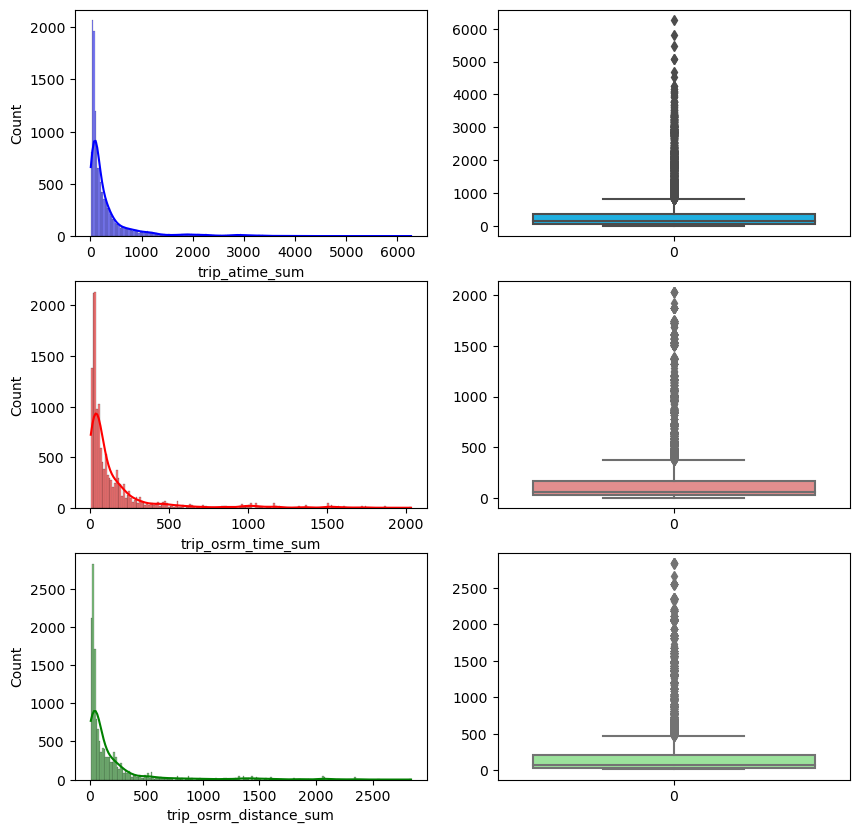

In [287]:
import warnings

warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_agg_df['trip_atime_sum'],kde=True,color='blue')
sns.boxplot(ax=axs[0,1],data=trip_agg_df['trip_atime_sum'],color='deepskyblue')

sns.histplot(ax=axs[1,0],data= trip_agg_df['trip_osrm_time_sum'],kde=True, color='red')
sns.boxplot(ax=axs[1,1],data= trip_agg_df['trip_osrm_time_sum'], color='lightcoral')

sns.histplot(ax=axs[2,0],data= trip_agg_df['trip_osrm_distance_sum'],kde=True,color='green')
sns.boxplot(ax=axs[2,1],data= trip_agg_df['trip_osrm_distance_sum'], color='lightgreen')

plt.show()

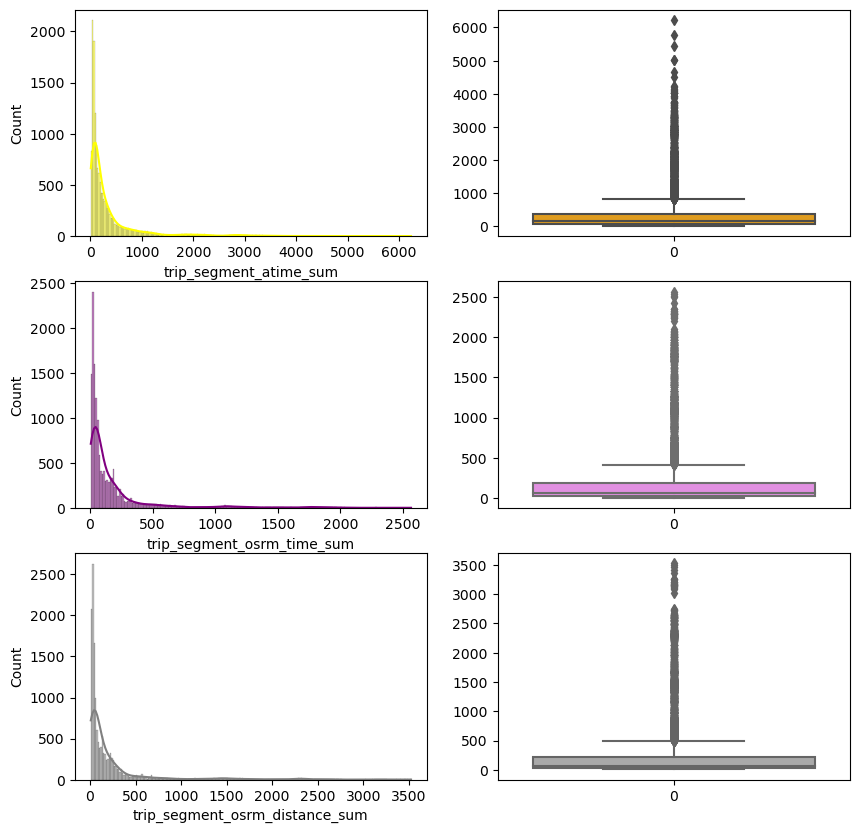

In [288]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_agg_df['trip_segment_atime_sum'],kde=True, color='yellow')
sns.boxplot(ax=axs[0,1],data= trip_agg_df['trip_segment_atime_sum'], color='orange')


sns.histplot(ax=axs[1,0],data= trip_agg_df['trip_segment_osrm_time_sum'],kde=True, color='purple')
sns.boxplot(ax=axs[1,1],data= trip_agg_df['trip_segment_osrm_time_sum'], color='violet')

sns.histplot(ax=axs[2,0],data= trip_agg_df['trip_segment_osrm_distance_sum'],kde=True, color='grey')
sns.boxplot(ax=axs[2,1],data= trip_agg_df['trip_segment_osrm_distance_sum'], color='darkgrey')


plt.show()

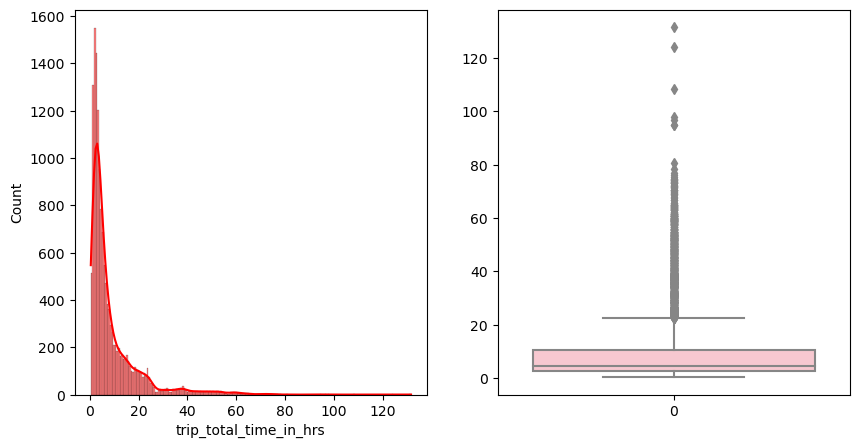

In [289]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_agg_df['trip_total_time_in_hrs'],kde=True, color = 'red')
sns.boxplot(ax=axs[1],data= trip_agg_df['trip_total_time_in_hrs'], color = 'pink')
plt.show()

<Axes: xlabel='trip_atime_sum', ylabel='Count'>

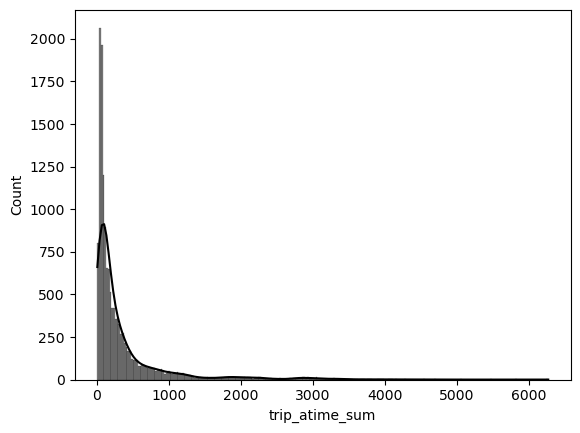

In [290]:
sns.histplot(data=trip_agg_df['trip_atime_sum'],kde=True, color = 'black')

<Axes: >

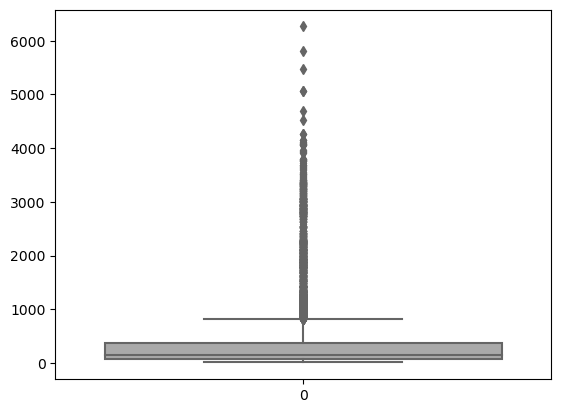

In [291]:
sns.boxplot(data=trip_agg_df['trip_atime_sum'], color = 'darkgrey')

Observation: from the baove boxplots we can conclude that the data has a lot of ouliers and replacing outlier values with IQR. 

In [292]:
def IQR_calc(row,cl, Q1,Q3, minval, maxval):
    #     Q1=row[cl].quantile(0.25)
    #     Q3=row[cl].quantile(0.75)
    #     minval=min(row[cl])
    #     maxval=max(row[cl])
    IQR=Q3-Q1
    if row[cl]<Q1-1.5*IQR:
        return min(minval, Q1-1.5*IQR)
    elif row[cl] > Q3+1.5*IQR:
        return min(maxval, Q3+1.5*IQR)
    else:
        return row[cl]

In [293]:
trip_agg_df.columns

Index(['trip_uuid', 'trip_atime_sum', 'trip_osrm_time_sum',
       'trip_osrm_distance_sum', 'trip_segment_atime_sum',
       'trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum',
       'trip_total_time_in_hrs'],
      dtype='object')

In [294]:
for cl in ['trip_atime_sum', 'trip_osrm_time_sum', 'trip_osrm_distance_sum', 'trip_segment_atime_sum','trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum','trip_total_time_in_hrs']:
    Q1=trip_agg_df[cl].quantile(0.25)
    Q3=trip_agg_df[cl].quantile(0.75)
    minval=min(trip_agg_df[cl])
    maxval=max(trip_agg_df[cl])
    trip_agg_df[cl]=trip_agg_df.apply(lambda row:IQR_calc(row,cl,Q1,Q3,minval, maxval) , axis=1)

In [295]:
trip_agg_df

,trip_uuid,trip_atime_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_atime_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.46300,82.0,62.0,64.855100,4.300482
14783,trip-153861104386292051,21.0,12.0,16.08820,21.0,11.0,16.088300,1.009842
14784,trip-153861106442901555,282.0,48.0,58.90370,281.0,88.0,104.886600,7.035331
14785,trip-153861115439069069,264.0,179.0,171.11030,258.0,221.0,223.532400,5.808548


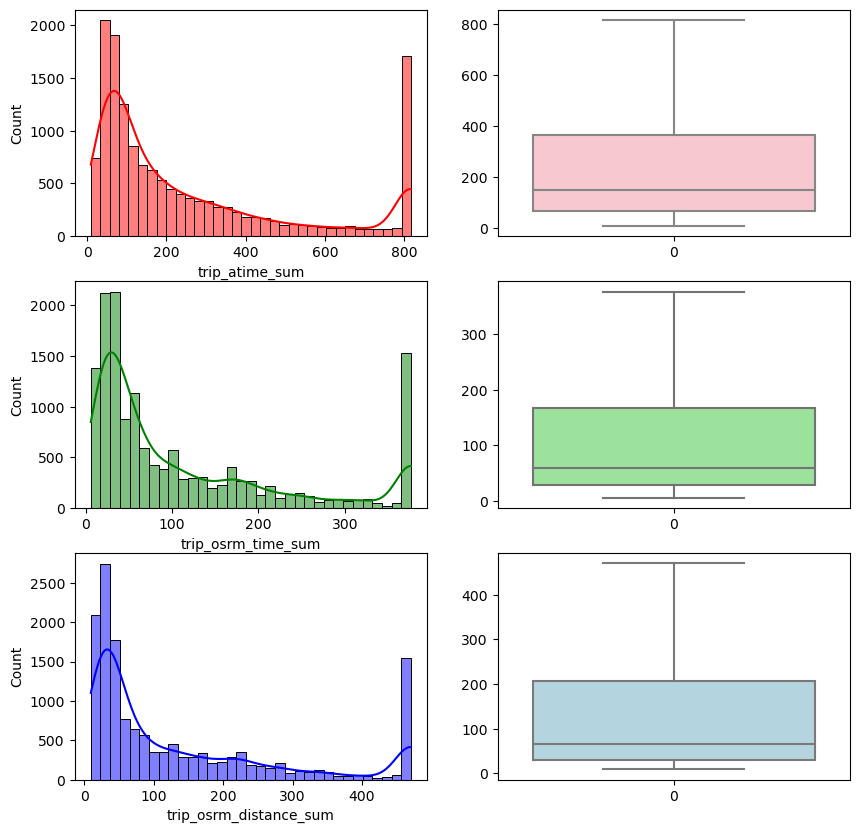

In [296]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_agg_df['trip_atime_sum'],kde=True, color = 'red')
sns.boxplot(ax=axs[0,1],data=trip_agg_df['trip_atime_sum'], color = 'pink')

sns.histplot(ax=axs[1,0],data= trip_agg_df['trip_osrm_time_sum'],kde=True, color = 'green')
sns.boxplot(ax=axs[1,1],data= trip_agg_df['trip_osrm_time_sum'], color = 'lightgreen')

sns.histplot(ax=axs[2,0],data= trip_agg_df['trip_osrm_distance_sum'],kde=True, color = 'blue')
sns.boxplot(ax=axs[2,1],data= trip_agg_df['trip_osrm_distance_sum'], color = 'lightblue')


plt.show()

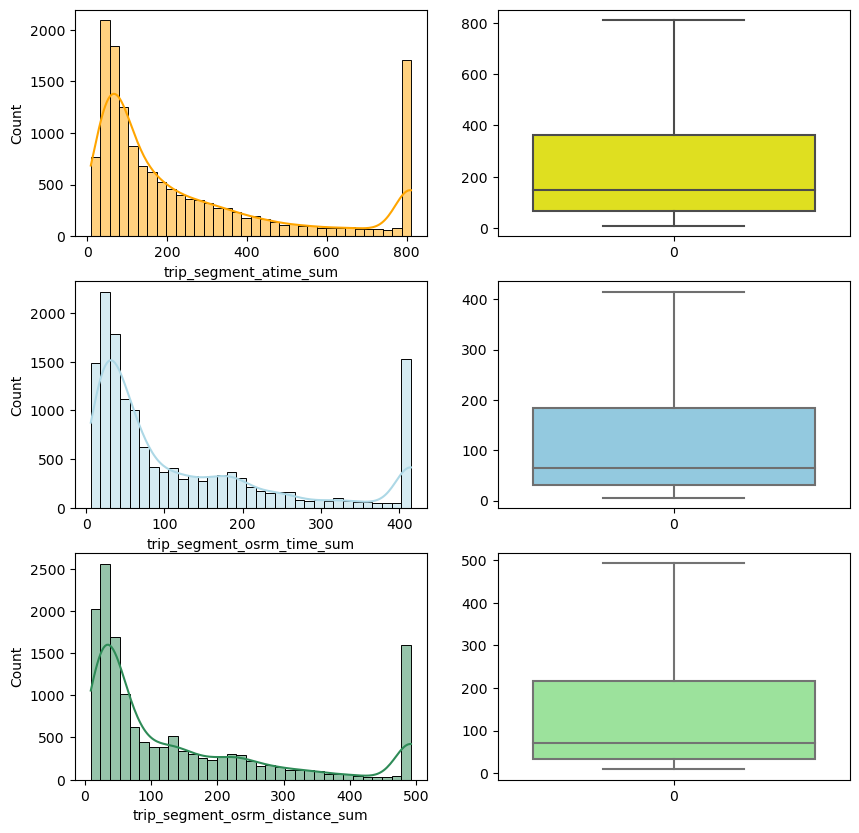

In [297]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_agg_df['trip_segment_atime_sum'],kde=True, color = 'orange')
sns.boxplot(ax=axs[0,1],data= trip_agg_df['trip_segment_atime_sum'], color = 'yellow')


sns.histplot(ax=axs[1,0],data= trip_agg_df['trip_segment_osrm_time_sum'],kde=True, color = 'lightblue')
sns.boxplot(ax=axs[1,1],data= trip_agg_df['trip_segment_osrm_time_sum'], color = 'skyblue')

sns.histplot(ax=axs[2,0],data= trip_agg_df['trip_segment_osrm_distance_sum'],kde=True, color = 'seagreen')
sns.boxplot(ax=axs[2,1],data= trip_agg_df['trip_segment_osrm_distance_sum'], color = 'lightgreen')


plt.show()

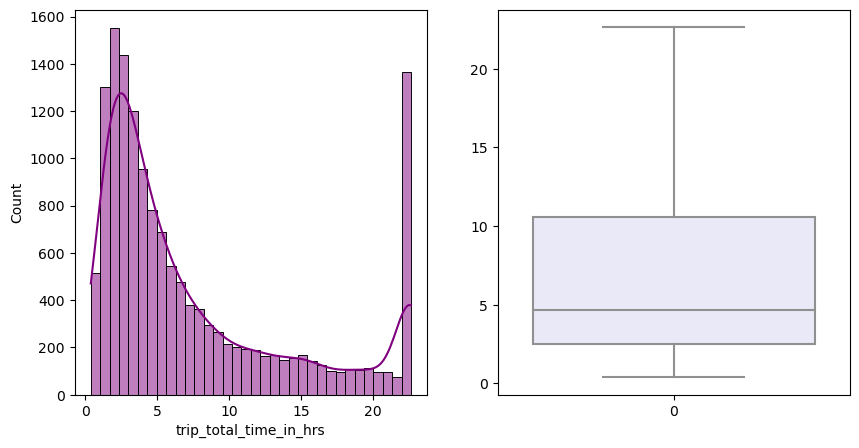

In [298]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_agg_df['trip_total_time_in_hrs'],kde=True, color = 'purple')
sns.boxplot(ax=axs[1],data= trip_agg_df['trip_total_time_in_hrs'], color = 'lavender')
plt.show()

3. Perform one-hot encoding on categorical features.
4. Normalize/ Standardize the numerical features using MinMaxScaler or
StandardScaler.

In [378]:
new_df_dvery['trip_month'] = new_df_dvery['trip_creation_time'].dt.month_name()
new_df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_code,trip_atime_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_atime_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs,corridor,trip_month
0,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB,September
1,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB,September
2,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB,September
3,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB,September
4,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,0,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,0,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548,IND628801AAA#IND628204AAA,October
144312,0,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,1,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA,October
144313,0,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,1,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA,October
144314,0,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,1,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583201AAA#IND583119AAA,October


In [387]:
new_df_dvery['trip_month'].unique()

array(['September', 'October'], dtype=object)

In [379]:
from sklearn.preprocessing import LabelEncoder

In [383]:
label_encoder = LabelEncoder()
new_df_dvery['data'] = label_encoder.fit_transform(new_df_dvery['data'])
new_df_dvery['data']

0         1
1         1
2         1
3         1
4         1
         ..
144311    0
144312    0
144313    0
144314    0
144315    0
Name: data, Length: 144316, dtype: int64

In [381]:
label_encoder = LabelEncoder()
new_df_dvery['route_type'] = label_encoder.fit_transform(new_df_dvery['route_type'])
new_df_dvery['route_type'].value_counts()

1    99132
0    45184
Name: route_type, dtype: int64

In [384]:
month_cat_num = new_df_dvery.copy()

# perform one-hot encoding
one_hot = pd.get_dummies(month_cat_num['trip_month'], prefix='month')

# concatenate one-hot encoded columns to original dataframe
month_cat_num = pd.concat([month_cat_num, one_hot], axis=1)

# drop original trip_month column
month_cat_num.drop('trip_month', axis=1, inplace=True)

month_cat_num[one_hot.columns].head()

,month_October,month_September
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# Hypothesis Testing


    
1. Perform hypothesis testing / visual analysis between :
    
    a. actual_time aggregated value and OSRM time aggregated value.

    b. actual_time aggregated value and segment actual time aggregated
        value.

    c. OSRM distance aggregated value and segment OSRM distance
        aggregated value.

    d. OSRM time aggregated value and segment OSRM time aggregated
        value.

2. Note: Aggregated values are the values you’ll get after merging the rows on the
basis of trip_uuid.

In [299]:
from scipy.stats import ttest_rel, ttest_ind 

Ttest paired sample test is used to find if there is a significant difference in actual trip aggregated time vs OSRM trip aggregated time for each trip

HO : mean Actual time to deliver package from source to destination is lesser than OSRM time for entire trip

HA: mean Actual time to deliver package from source to destination is greater than OSRM time

In [300]:
stat, pval=ttest_rel(trip_agg_df['trip_atime_sum'],
                     trip_agg_df['trip_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")
if pval <0.05:
    print("We reject H0 :")
    print("mean Actual time to deliver package from source to destination is greater than OSRM time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual time to deliver package from source to destination is lesser or equal  than OSRM time")

stat 112.89026761644506 pval 0.0
We reject H0 :
mean Actual time to deliver package from source to destination is greater than OSRM time


In [301]:
np.mean(trip_agg_df['trip_atime_sum']), np.mean(trip_agg_df['trip_osrm_time_sum'])

(262.29289240549133, 114.49563806045852)

b. actual_time aggregated value and segment actual time aggregated value. 

Ttest paired sample test to know if there is significant difference in actual trip aggregated time vs segment actual time aggregated value for each trip.

HO : mean Actual aggregated trip time to deliver package from source to destination is lesser than segment actual time aggregated value  for entire trip

HA: mean Actual aggregated trip time to deliver package from source to destination is greater than segment actual time aggregated value  for entire trip

In [388]:
stat, pval=ttest_rel(trip_agg_df['trip_atime_sum'],
                     trip_agg_df['trip_segment_atime_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")
if pval <0.05:
    print("We reject H0 :")
    print("mean Actual trip aggregated time to deliver package from source to destination is greater than segment actual aggregated time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated time to deliver package from source to destination is lesser or equal  than segment actual aggregated time")

stat 122.11851987195247 pval 0.0
We reject H0 :
mean Actual trip aggregated time to deliver package from source to destination is greater than segment actual aggregated time


c.OSRM distance aggregated value and segment OSRM distance aggregated value. 

Ttest paired sample test is used to know if there is a significant difference in OSRM distance aggregated value vs segment actual aggregated distance for each trip

HO : mean Actual aggregated OSRM distance for trip to deliver package from source to destination is lesser than segment actual OSRM distance  aggregated value  for entire trip

HA: mean Actual aggregated OSRM distance  for trip to deliver package from source to destination is greater than segment actual OSRM distance  aggregated value  for entire trip

In [303]:
stat, pval=ttest_rel(trip_agg_df['trip_osrm_distance_sum'],
                     trip_agg_df['trip_segment_osrm_distance_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

if pval <0.05:
    print("We reject H0 :")
    print("mean Actual trip OSRM distance for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM distance for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip")

stat -50.07621180430228 pval 1.0
We fail to  reject H0 :
mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip


d. OSRM time aggregated value and segment OSRM time aggregated value. 

Ttest paired sample test to know if there is significant difference in OSRM time aggregated value vs Segment OSRM aggregated time for each trip

HO : mean Actual aggregated OSRM time aggreated  for trip to deliver package from source to destination is lesser than segment  OSRM  aggregated time   value  for entire trip

HA: mean Actual aggregated OSRM time aggregated   for trip to deliver package from source to destination is greater than segment  OSRM   aggregated time value  for entire trip

In [304]:
stat, pval=ttest_rel(trip_agg_df['trip_osrm_time_sum'],
                     trip_agg_df['trip_segment_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

if pval <0.05:
    print("We reject H0 :")
    print("mean Actual trip aggregated  OSRM time  for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM time for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip")

stat -63.41875343116358 pval 1.0
We fail to  reject H0 :
mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip


# Business Insights

In [305]:
df_orders_from=df_dvery_1.groupby('source_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
df_orders_from=df_orders_from.sort_values(by='count_trips', ascending=False)
df_orders_from

,source_state,count_trips
17,Maharashtra,2748
14,Karnataka,2324
10,Haryana,1824
25,Tamil Nadu,1109
28,Uttar Pradesh,873
26,Telangana,825
7,Delhi,790
9,Gujarat,774
30,West Bengal,682
23,Punjab,643


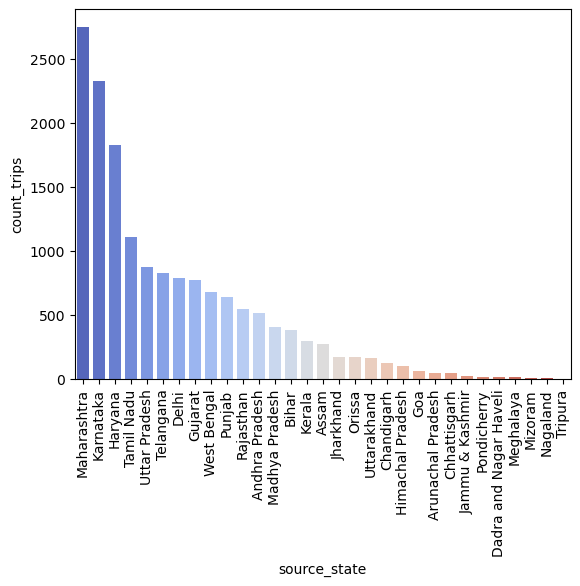

In [306]:
sns.barplot(data=df_orders_from,x='source_state',y='count_trips',palette="coolwarm" )
plt.xticks(rotation=90)
plt.show()

# Most Orders - Destination States

In [307]:
df_orders_to=df_dvery_1.groupby('destination_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
df_orders_to=df_orders_to.sort_values(by='count_trips', ascending=False)
df_orders_to

,destination_state,count_trips
18,Maharashtra,2637
15,Karnataka,2425
11,Haryana,1800
26,Tamil Nadu,1097
29,Uttar Pradesh,882
27,Telangana,856
10,Gujarat,791
31,West Bengal,713
24,Punjab,693
8,Delhi,674


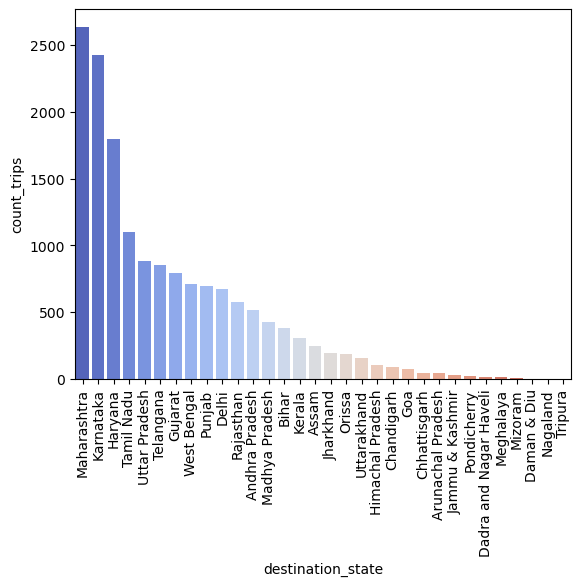

In [308]:
sns.barplot(data=df_orders_to,x='destination_state',y='count_trips',palette="coolwarm" )
plt.xticks(rotation=90)
plt.show()

In [318]:
new_df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_code,source_code,trip_atime_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_atime_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs,corridor
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548,IND628801AAA#IND628204AAA
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583201AAA#IND583119AAA


In [324]:
new_df_dvery['corridor']=new_df_dvery.apply(lambda x:"#".join([x['source_center'],x['destination_center']]), axis=1)
new_df_dvery

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_code,source_code,trip_atime_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_atime_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs,corridor
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548,IND628801AAA#IND628204AAA
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583201AAA#IND583119AAA


In [320]:
new_df_dvery['trip_uuid']

0         trip-153671041653548748
1         trip-153671041653548748
2         trip-153671041653548748
3         trip-153671041653548748
4         trip-153671041653548748
                   ...           
144311    trip-153861115439069069
144312    trip-153861118270144424
144313    trip-153861118270144424
144314    trip-153861118270144424
144315    trip-153861118270144424
Name: trip_uuid, Length: 144316, dtype: object

In [346]:
new_df_dvery_1 = new_df_dvery.groupby(['trip_uuid', 'corridor']).nth(-1).reset_index()
new_df_dvery_1 = new_df_dvery_1.drop_duplicates(subset=['trip_uuid', 'corridor'])

corridor_total_trips = new_df_dvery_1.groupby('corridor').agg(total_trips=('trip_uuid', 'nunique')).reset_index()
corridor_total_trips

,corridor,total_trips
0,IND000000AAL#IND411033AAA,18
1,IND000000AAQ#IND700028AAB,2
2,IND000000AAS#IND783370AAC,9
3,IND000000AAZ#IND444203AAA,1
4,IND000000AAZ#IND444303AAA,1
...,...,...
2736,IND854326AAB#IND854334AAA,1
2737,IND854334AAA#IND852118AAA,7
2738,IND854334AAA#IND854335AAA,2
2739,IND854335AAA#IND852111AAA,17


In [347]:
new_df_dvery_1.columns

Index(['trip_uuid', 'corridor', 'data', 'trip_creation_time',
       'route_schedule_uuid', 'route_type', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_day', 'destination_state', 'source_state',
       'destination_city', 'source_city', 'destination_place', 'source_place',
       'destination_code', 'source_code', 'trip_atime_sum',
       'trip_osrm

In [348]:
df_corridor_actual_time_mean=new_df_dvery_1.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_actual_time_mean=('segment_actual_time_cumsum','mean')).reset_index()
df_corridor_actual_time_mean

,corridor,corridor_actual_time_mean
0,IND000000AAL#IND411033AAA,87.388889
1,IND000000AAQ#IND700028AAB,84.500000
2,IND000000AAS#IND783370AAC,61.000000
3,IND000000AAZ#IND444203AAA,287.000000
4,IND000000AAZ#IND444303AAA,159.000000
...,...,...
2736,IND854326AAB#IND854334AAA,171.000000
2737,IND854334AAA#IND852118AAA,28.285714
2738,IND854334AAA#IND854335AAA,40.500000
2739,IND854335AAA#IND852111AAA,39.470588


In [349]:
df_corridor_osrm_time_mean=new_df_dvery_1.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_dsrm_time_mean=('segment_osrm_time_cumsum','mean')).reset_index()
df_corridor_osrm_time_mean

,corridor,corridor_dsrm_time_mean
0,IND000000AAL#IND411033AAA,29.777778
1,IND000000AAQ#IND700028AAB,14.000000
2,IND000000AAS#IND783370AAC,29.000000
3,IND000000AAZ#IND444203AAA,77.000000
4,IND000000AAZ#IND444303AAA,68.000000
...,...,...
2736,IND854326AAB#IND854334AAA,47.000000
2737,IND854334AAA#IND852118AAA,21.428571
2738,IND854334AAA#IND854335AAA,29.500000
2739,IND854335AAA#IND852111AAA,19.294118


In [350]:
df_corridor_osrm_distance_mean=new_df_dvery_1.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_osrm_distance_mean=('segment_osrm_distance_cumsum','mean')).reset_index()
df_corridor_osrm_distance_mean

,corridor,corridor_osrm_distance_mean
0,IND000000AAL#IND411033AAA,28.885561
1,IND000000AAQ#IND700028AAB,13.900700
2,IND000000AAS#IND783370AAC,41.461622
3,IND000000AAZ#IND444203AAA,109.306700
4,IND000000AAZ#IND444303AAA,93.706900
...,...,...
2736,IND854326AAB#IND854334AAA,67.378600
2737,IND854334AAA#IND852118AAA,23.881371
2738,IND854334AAA#IND854335AAA,36.500750
2739,IND854335AAA#IND852111AAA,27.870394


In [351]:
df_corridor_agg=pd.concat(
    objs=(
            iDF.set_index('corridor') for iDF in (corridor_total_trips,
                                                  df_corridor_actual_time_mean,
                                                  df_corridor_osrm_distance_mean,
                                                   df_corridor_osrm_time_mean
                                                 )
         ),
    axis=1, 
    join='inner'
).reset_index()
df_corridor_agg

,corridor,total_trips,corridor_actual_time_mean,corridor_osrm_distance_mean,corridor_dsrm_time_mean
0,IND000000AAL#IND411033AAA,18,87.388889,28.885561,29.777778
1,IND000000AAQ#IND700028AAB,2,84.500000,13.900700,14.000000
2,IND000000AAS#IND783370AAC,9,61.000000,41.461622,29.000000
3,IND000000AAZ#IND444203AAA,1,287.000000,109.306700,77.000000
4,IND000000AAZ#IND444303AAA,1,159.000000,93.706900,68.000000
...,...,...,...,...,...
2736,IND854326AAB#IND854334AAA,1,171.000000,67.378600,47.000000
2737,IND854334AAA#IND852118AAA,7,28.285714,23.881371,21.428571
2738,IND854334AAA#IND854335AAA,2,40.500000,36.500750,29.500000
2739,IND854335AAA#IND852111AAA,17,39.470588,27.870394,19.294118


# Busiest Corridor by Trips

In [352]:
df_top20_trips_corridor=df_corridor_agg[['corridor','total_trips']].sort_values(by='total_trips', ascending=False)[:20]
df_top20_trips_corridor

,corridor,total_trips
1743,IND562132AAA#IND560300AAA,151
1742,IND562132AAA#IND560099AAB,127
1687,IND560099AAB#IND560300AAA,121
1703,IND560300AAA#IND562132AAA,108
1059,IND411033AAA#IND421302AAG,107
1131,IND421302AAG#IND400072AAB,105
1688,IND560099AAB#IND562132AAA,102
66,IND000000ACT#IND000000ACB,100
989,IND400072AAD#IND421302AAG,99
37,IND000000ACB#IND131028AAB,92


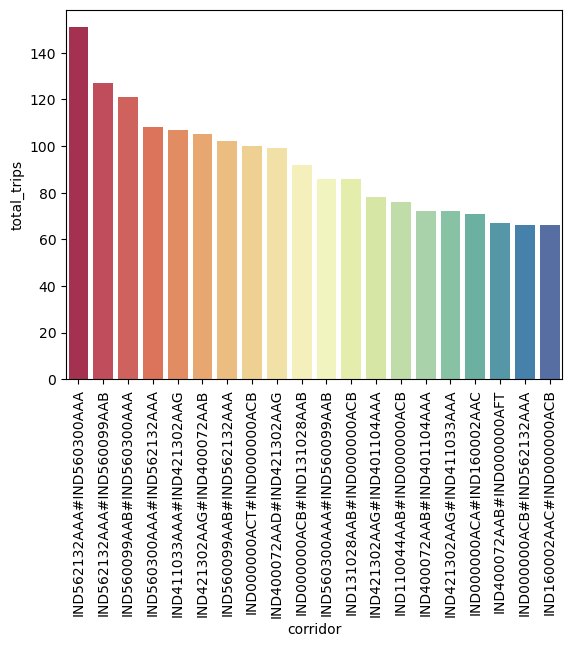

In [360]:
sns.barplot(data=df_top20_trips_corridor,x='corridor',y='total_trips',palette="Spectral")
plt.xticks(rotation=90)
plt.show()

# Busiest Corridor by  ActualTime

In [362]:
df_top20trips_time_corridor=df_corridor_agg[['corridor','corridor_actual_time_mean']].sort_values(by='corridor_actual_time_mean', ascending=False)[:20]
df_top20trips_time_corridor

,corridor,corridor_actual_time_mean
349,IND160002AAC#IND562132AAA,3751.000000
2475,IND781018AAB#IND110037AAM,3341.764706
115,IND110037AAM#IND781018AAB,3281.000000
2240,IND712311AAA#IND421302AAG,3141.200000
58,IND000000ACB#IND600056AAB,3090.857143
1754,IND562132AAA#IND712311AAA,3010.333333
1148,IND421302AAG#IND712311AAA,2902.000000
348,IND160002AAC#IND421302AAG,2867.000000
57,IND000000ACB#IND562132AAA,2864.136364
1721,IND562132AAA#IND000000ACB,2766.454545


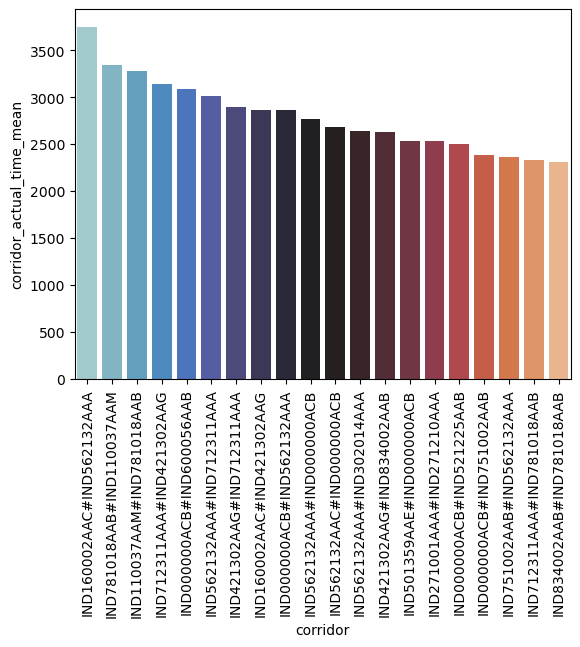

In [363]:
sns.barplot(data=df_top20trips_time_corridor,x='corridor',y='corridor_actual_time_mean',palette="icefire")
plt.xticks(rotation=90)
plt.show()

In [364]:
df_corridor_agg[['corridor_actual_time_mean','corridor_osrm_distance_mean','corridor_dsrm_time_mean','total_trips']].corr()

,corridor_actual_time_mean,corridor_osrm_distance_mean,corridor_dsrm_time_mean,total_trips
corridor_actual_time_mean,1.000000,0.926574,0.921375,0.018440
corridor_osrm_distance_mean,0.926574,1.000000,0.995586,0.050239
corridor_dsrm_time_mean,0.921375,0.995586,1.000000,0.050958
total_trips,0.018440,0.050239,0.050958,1.000000


# Busiest Corridor by Distance

In [365]:
df_top20trips_dist_corridor=df_corridor_agg[['corridor','corridor_osrm_distance_mean']].sort_values(by='corridor_osrm_distance_mean', ascending=False)[:20]
df_top20trips_dist_corridor

,corridor,corridor_osrm_distance_mean
1148,IND421302AAG#IND712311AAA,2584.622933
349,IND160002AAC#IND562132AAA,2500.214500
2240,IND712311AAA#IND421302AAG,2363.329580
58,IND000000ACB#IND600056AAB,2361.555264
1721,IND562132AAA#IND000000ACB,2312.589602
1756,IND562132AAC#IND000000ACB,2307.137400
2475,IND781018AAB#IND110037AAM,2300.517159
57,IND000000ACB#IND562132AAA,2288.400620
115,IND110037AAM#IND781018AAB,2181.460700
60,IND000000ACB#IND751002AAB,2134.451707


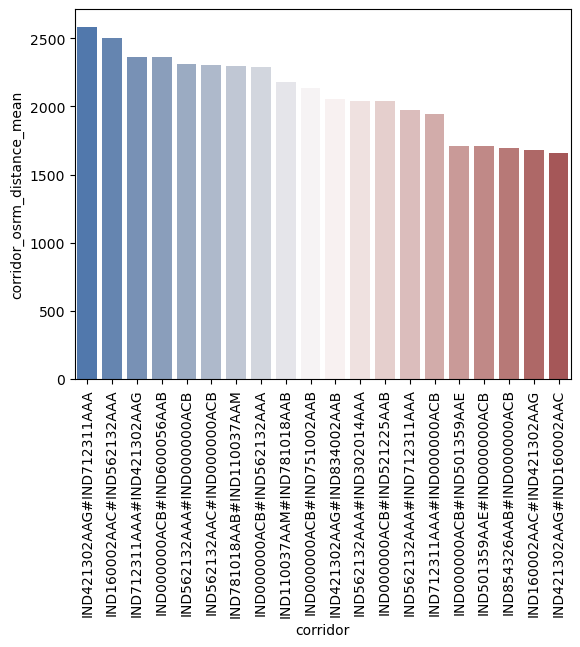

In [366]:
sns.barplot(data=df_top20trips_dist_corridor,x='corridor',y='corridor_osrm_distance_mean',palette="vlag")
plt.xticks(rotation=90)
plt.show()

# Business Recommendations:

In [ ]:

States such as Maharashtra, Karnataka, Tamil Nadu, Utter Pradesh, Telangana and Gujarat States are states where most delivery trips are done. Most Bussiest corridor are in these states.

Business should focus on identifying best corridors to move packages very quickly, they should focus on potential reasons for difference in actual delivery time and osrm delivery time value.

If Actual delivery time is higher than osrm time then should focus on hops which are causing delays, if delays are related to processing or logistic that should be quickly fixed.

Identifying best route to move packages quickly if the issue is not related to delivery and logistic process then should focus on 

As the actual distances and times are greater than the OSRM distances and times, the trip can be completed before estimated time and in lesser budget.

Trips with longer durations should be optimized by choosing different mode of transport.

Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.